This module provides a streamlined interface for visualizing brain surface data. It includes three core functions tailored for different anatomical scopes:

- `draw_cortex`: Visualizes data on the cerebral cortex surface.
- `draw_subcortex_tian`: Displays subcortical structures using the Tian (2020) atlas[^1].
- `draw_sftian`: Renders a unified view of both cortical and subcortical structures.

[^1]: Tian, Y., Margulies, D. S., Breakspear, M., & Zalesky, A. (2020). Topographic organization of the human subcortex unveiled with functional connectivity gradients. *Nature Neuroscience*, 23(11), 1421–1432. https://doi.org/10.1038/s41593-020-00711-6

## Cortical Surface Visualization

This section introduces visualization of surface data defined at either the vertex or atlas level.

Vertex-wise datasets often exclude the medial wall (the non-cortical connection between hemispheres). In the standard fsLR-32k space, a full surface mesh contains 64,984 vertices, but the real data is frequently restricted to the 54,984 cortical vertices that exclude the medial wall.

The `draw_cortex` function automatically handles this discrepancy. If your input data omits the medial wall, the function will detect and pad the data appropriately, allowing you to focus on visualization without manual preprocessing.

In [1]:
import numpy as np
from neurocat.util import get_surface_data
from neurocat.plotting import draw_cortex as dc
from neurocat import color

To demonstrate vertex-level plotting, we first load a T1w/T2w myelin map from the HCP S1200 release using `neuromaps`.

In [2]:
from neuromaps.datasets import fetch_annotation
t1t2 = fetch_annotation(source='hcps1200', desc='myelinmap', space='fsLR', den='32k')
t1t2 = get_surface_data(t1t2)
t1t2.shape

(64984,)

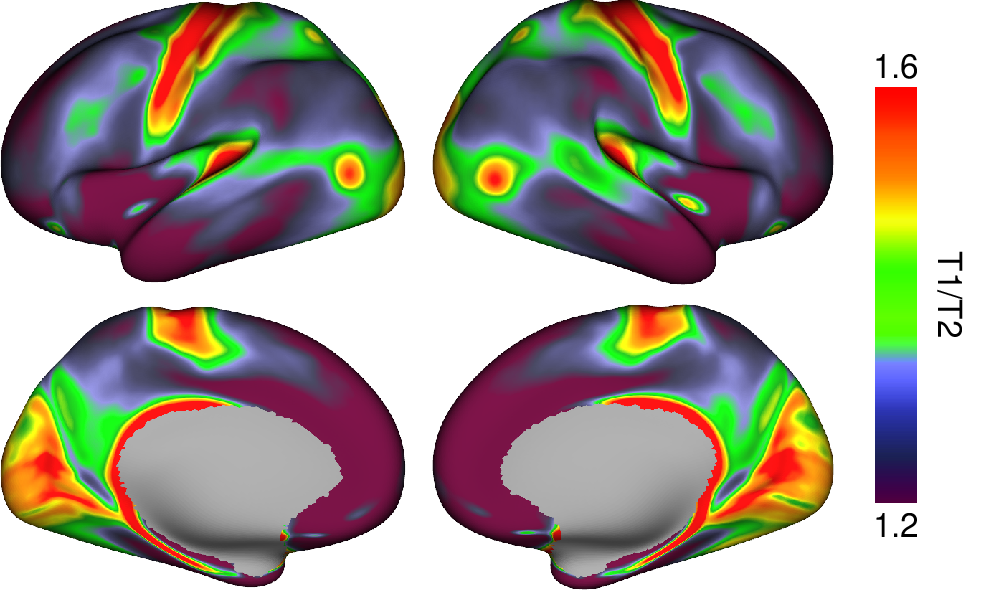

In [3]:
dc(t1t2,
   color.cmap.myelin(),
   (1.2,1.6),
   legend='T1/T2'
  )

If your data is defined/calculated in parcellated (atlas) space, you do not need to manually map it to surface vertices. `draw_cortex` performs this conversion internally.

Common parcellations such as the Schaefer and Glasser atlases are supported; the function automatically identifies the atlas from the length of the input vector.

The following example computes the principal functional connectivity gradient using the Schaefer 400-parcel atlas and visualizes the result directly on the cortical surface.

In [4]:
from brainspace.datasets import load_group_fc
from brainspace.gradient import GradientMaps
conn_matrix = load_group_fc('schaefer', scale=400)
gm = GradientMaps(n_components=10, random_state=0)
gm.fit(conn_matrix)

principal = gm.gradients_[:, 0]

# scale to -6 to 6
principal = (principal - principal.min()) / (principal.max() - principal.min()) * 12 -6

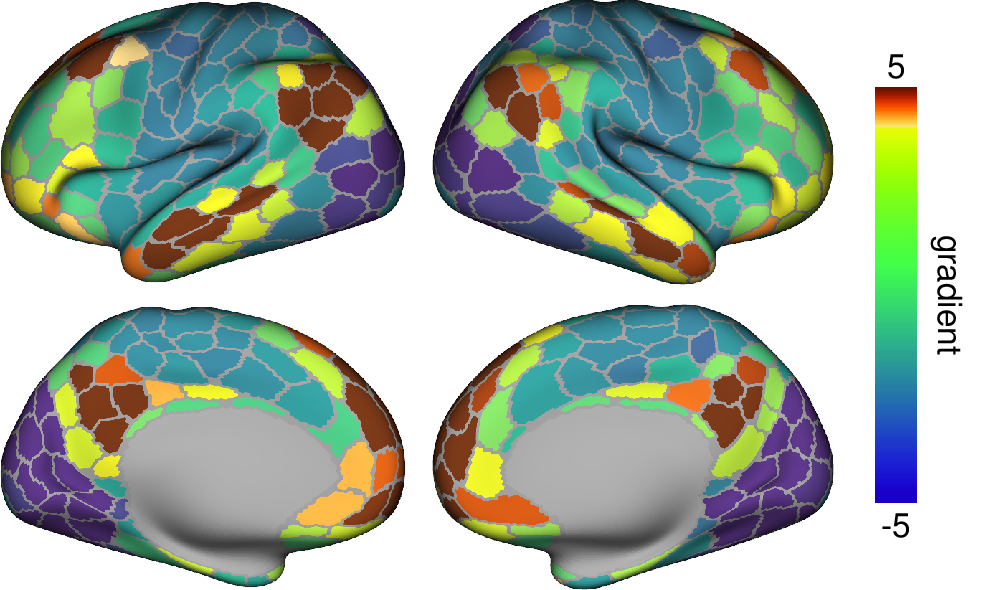

In [5]:
dc(principal,
  color.cmap.gradient(),
  (-5,5),
  legend='gradient'
  )

## Combined Cortical and Subcortical Visualization

In the example below, we use `draw_sftian` to render cortical parcels (Schaefer 400) alongside subcortical structures (Tian 2020 atlas) in a single, unified plot.

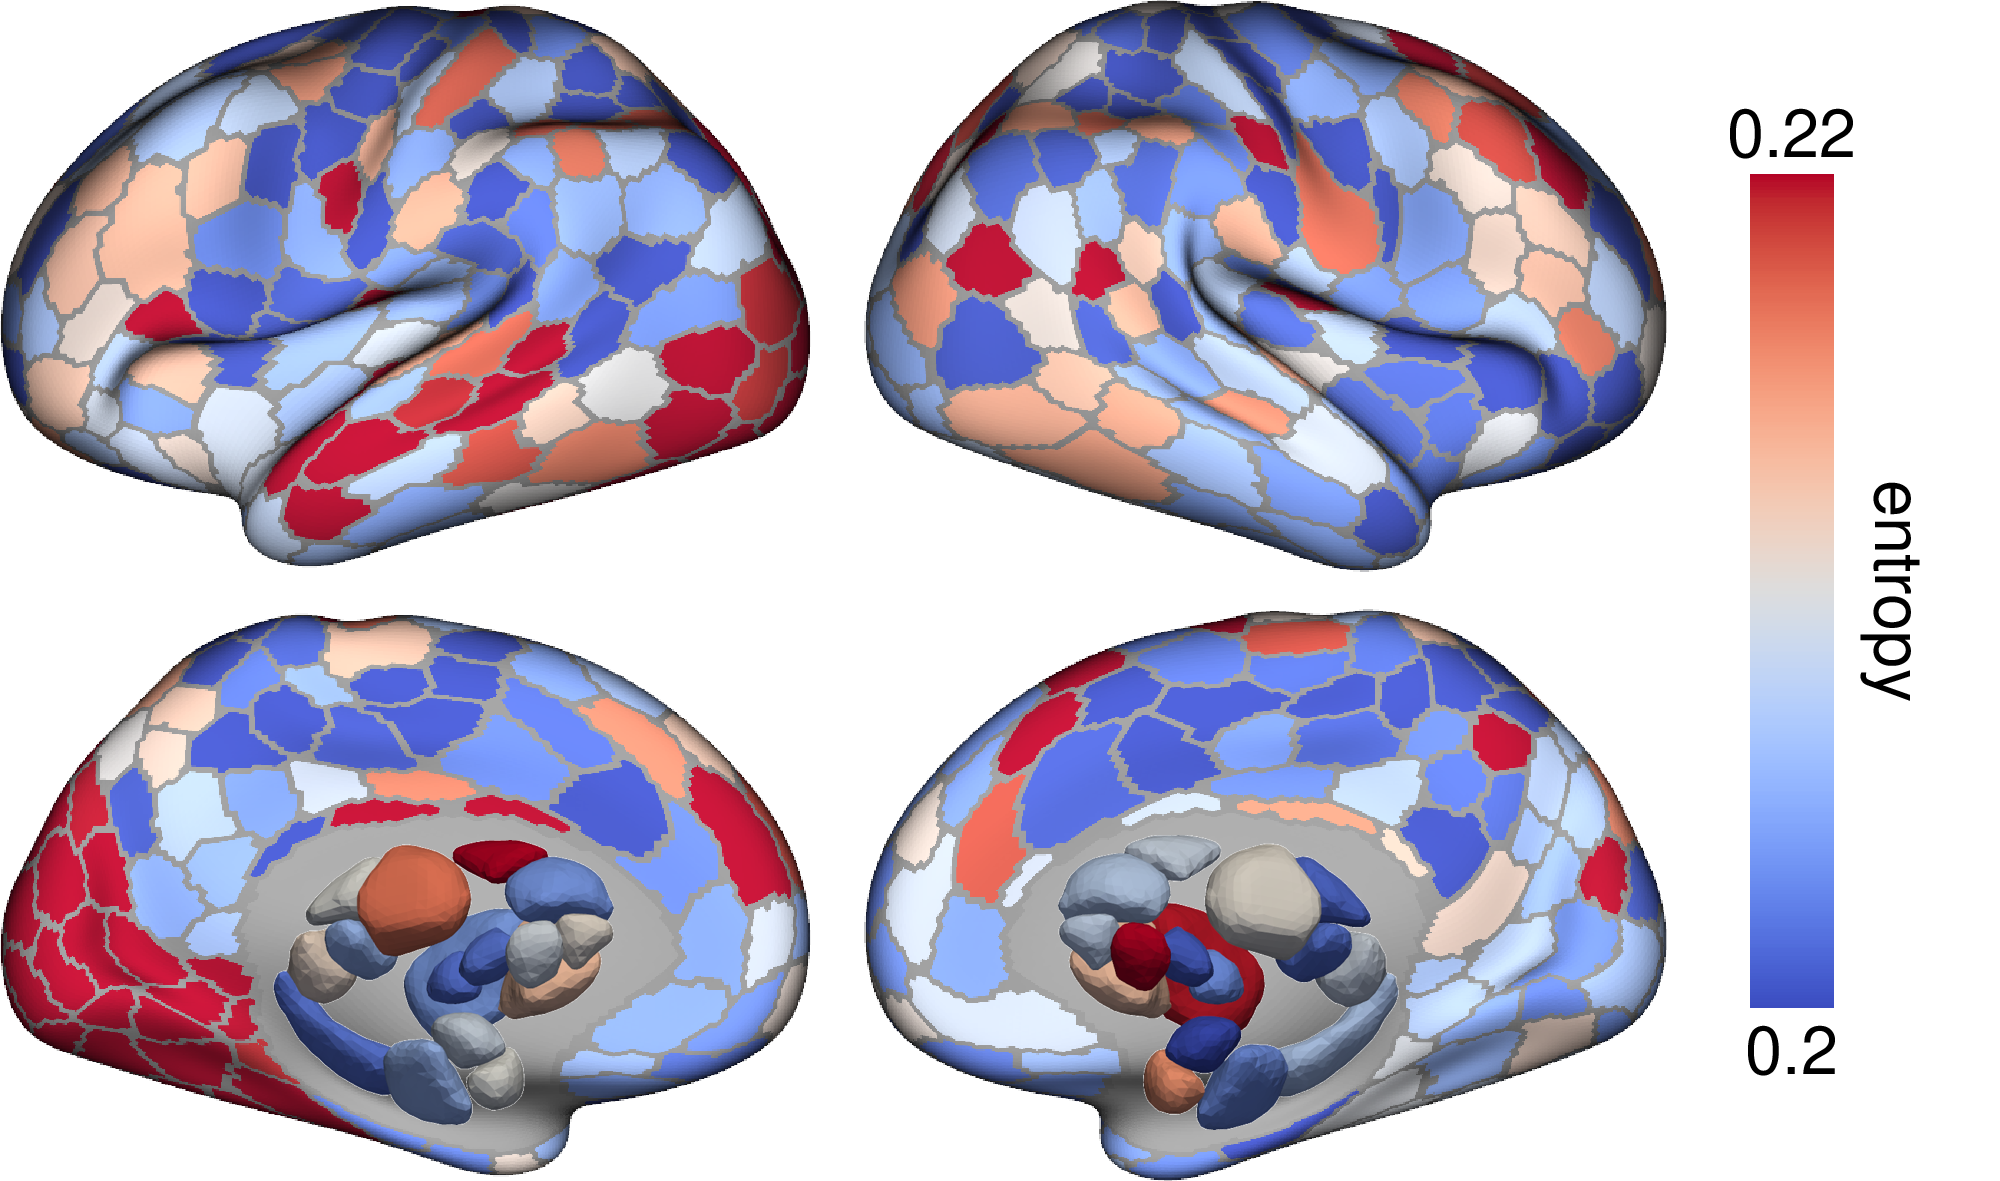

In [9]:
from neurocat.plotting import draw_sftian as dst
dst(np.load('se_schaefer432_hcpya_group.npy'),
    'coolwarm',
    (0.2, 0.22),
    legend='entropy'
    )